In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

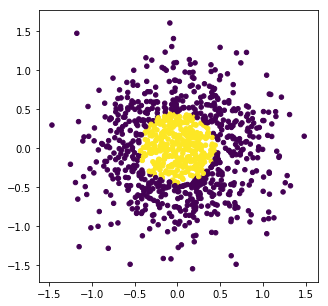

In [2]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

# Create your circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .2

plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s=20)

This needs a circular boundary. Transform data from two to three dimensions by adding a new feature. ($x^2 + y^2$.)

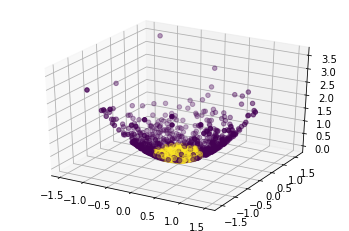

In [7]:
# We're doing some 3D plotting now. 

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)


AttributeError: ignored

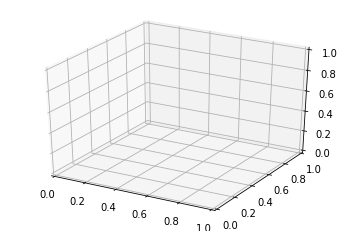

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-5, 5, 1), range(-5, 5, 1))
ax.plot_surface(xx, yy, .2, color='k', alpha=.5)
ax.hold(True)
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

The point is you can transform the data back from 3-d after findind the optimal boundary, but it is usually not practical with real data because there are usually too many dimensions.

You’ve heard the term "kernel" previously to refer to the central hub of your computer, linking hardware and OS. You might be used to stopping and re-running your Python kernel in Jupyter notebooks. What we’re talking about here is totally different.

Here we think of kernel functions (or just "kernels") as a way of mapping data to a space using weights. You can see kernels all over data science once you start looking for them.

The most common example is probably kernel smoothing. With kernel smoothing you take a series of observations and instead of plotting each one individually you generate a smoothed curve. This smoothing is a byproduct of each observation becoming a weighted distribution in and of itself and then aggregating those cumulative distributions, resulting in something smooth rather than jumpy.

Kernels are a huge topic, and as a term it’s used to refer to many different but related concepts. The wiki disambiguation page for kernels has links to 22 different pages on kernels that are in some way related to mathematics or computing. It’s definitely a lot, and a field worthy of its own course (or more honestly several).

Kernels in SVM
For our purposes with SVM, a kernel is a function that computes how "similar" two vectors are by computing their dot product. Even more specifically, in SVM a kernel is a function that implicitly computes the dot product between two vectors in a higher-dimensional space without actually transforming the vectors into that space.

This property is handy because the dot product is all we need to find our optimal hyperplane in a higher dimensional space. Trust us for now on that. The complexity of these kernel functions depend only on the number of dimensions of the input, not on the number of dimensions in the higher-dimensional feature space, so you can work with an infinite-dimensional feature space just as easily as with the space of your input data. This is called the kernel trick, and lets us work with feature spaces that would otherwise be practically impossible to manage.

there are multiple kernels you can use in SVM. The default in SKLearn is called the radial basis function, which uses a Gaussian decay according to the distance from the original point. This is the most common choice, and for our purposes you should stick to it unless you have a strong reason not to.

You can also use linear kernels, polynomial kernels, or sigmoid kernels - all of which are preprogrammed into SKLearn’s SVC function.

When do you have a strong reason to choose another kernel? You may know enough about your data and the geometry it follows that you can choose a more appropriate kernel. The other, more common, method for deciding which kernel to use is to rely upon cross-validation. As long as you are within the training set, using cross validation is a reasonable way to choose a kernel methodology, but if you're tuning other hyperparameters as well this could become quite a long process. Be aware that some kernels will lead to overfitting in specific situations, so you want to be wary.

##Extensions

So far we've only talked about using SVM as a binary classifier. If SVM only worked as a binary classifier it probably wouldn't have seen the wide adoption and use that it has. How do we extend it to cover multiple classes?

The simplest way is to do a hold-one-out form of binary classifier many many times (or for as many values as your outcome can take). Then for each category you create a binary classifier between having that category or having any other outcome. To aggregate these and create a multi-class classifier, each one has an output function to define its confidence in classification, which is related to its distance from the boundary and the weights for the accuracy of the classifier. The highest output value dominates thereby deciding the class.

##SVM as a Regressor
Support Vector Regression (SVR) operates much like an inversion of the classification problems we've been dealing with thus far. In classification we had a computational advantage because we were only interested in the points closest to the boundary. In regression, we instead are only interested in values far away from the prediction.

There are two major values we tune in SVR, C and epsilon. C is called the box constraint and sets the penalty for being outside of our margin. Epsilon sets the size of our margin. So again much like the classification problem we gather our data and find its distance from a specified point (previously the boundary, now the prediction) and optimize the cost from observations being outside the margin. This ends up being a huge advantage of SVM for regression: you can set the sensitivity when building the model, not just after the fact.

SVM's primary advantage is its flexibility. It can have great visual explanatory power (linear SVC), tremendous accuracy (kernel smoothing), clustering (SVClustering), or the ability to control the specificity of training (SVR). Some of these options come at the cost of computational efficacy and explanatory power, particularly when in high dimensions when kernels get involved, but overall it remains a versatile modeling class that is capable of doing many different things very well.